## Import packages

In [437]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
from matplotlib import gridspec
import random                        # for generating random numbers
import seaborn as sns
import pandas as pd
import sys
from scipy.integrate import solve_ivp
from sklearn.metrics import mean_squared_error

## Load the data

In [438]:
x0_df = pd.read_csv("data/linear_vectorfield_data_x0.txt", names=["x0", "y0"])
x1_df = pd.read_csv("data/linear_vectorfield_data_x1.txt", names=["x1", "y1"])
x0_np = np.loadtxt("data/linear_vectorfield_data_x0.txt")
x1_np = np.loadtxt("data/linear_vectorfield_data_x1.txt")

## Part 1
Description: Estimate the linear vector field that was used to generate the points $x_{1}$ from the points $x_{0}$ 

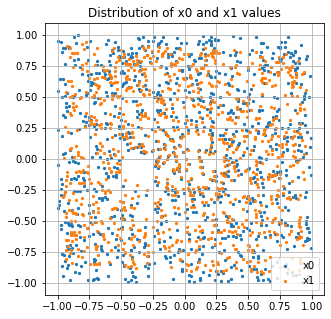

In [439]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.scatter(x0_np[:,0], x0_np[:, 1], s = 5, label='x0')
ax.scatter(x1_np[:,0], x1_np[:, 1], s = 5, label="x1")
ax.set_title("Distribution of x0 and x1 values")
ax.legend()
ax.grid()

fig.savefig('images/Part1_distributionX0X1', dpi=150)

Description: Solve the linear system and compute the mean squared error. Use the finite difference formula below to estimate vectors $v^{(k)}$ at all points $x^{k}_{o}$ with a time step $\Delta$ t that will minimize the error

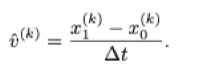

use numpy.linalg.lstsq Return the least-squares solution to a linear matrix equation.

In [440]:
delta_t = 1
v = (x1_np - x0_np) / delta_t
A = np.linalg.lstsq(x0_np, v, rcond=None)[0]
A

array([[-0.04935524, -0.04638232],
       [ 0.02319115, -0.09573757]])

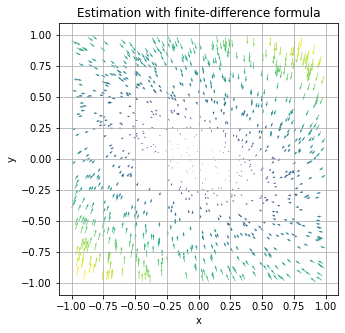

In [441]:
fig2 = plt.figure(figsize=(5,5))
ax2 = fig2.add_subplot()
ax2.quiver(x0_np[:,0], x0_np[:, 1], v[:,0], v[:, 1], np.linalg.norm(v,axis=1),cmap='viridis')
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Estimation with finite-difference formula")
ax2.grid()

fig2.savefig('images/Part1_FiniteDiffFormula', dpi=150)

In [442]:
mse = mean_squared_error(v, x0_np)
print('Mean squared error:', mse )

Mean squared error: 0.39087737790360555


## Part 2

solutin you get out of ode is not the actual solutiono, need to access the solution object for x and y

In [443]:
sol = np.zeros((x0_np.shape[0], 2))
for i in range(0,len(x0_np)):
    sol[i, :] = solve_ivp(lambda t, x: A @ x, t_span=[0, 0.1], t_eval=[0.1], y0=x0_np[i, :]).y.reshape(-1)

In [444]:
mse = mean_squared_error(sol, x0_np)
print('Mean squared error:', mse )

Mean squared error: 2.429222831823703e-05


In [445]:
t_end = 0.1

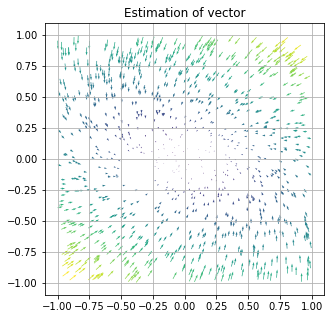

In [446]:
fig3 = plt.figure(figsize=(5,5))
v_sol = (sol - x0_np) / t_end
ax3 = fig3.add_subplot()
ax3.quiver(x0_np[:,0], x0_np[:,1], v_sol[:,0], v_sol[:,1], np.linalg.norm(v,axis=1),cmap='viridis')
ax3.set_title("Estimation of vector")
ax3.grid()

fig3.savefig('images/Part2_estimationVector', dpi=150)

## Part three:

Visualize the trajectory as well as the phase portrait

In [447]:
sol_2 = solve_ivp(eq, t_span=[0, 100], t_eval=np.arange(0,100,0.1), y0=np.array([10,10]))

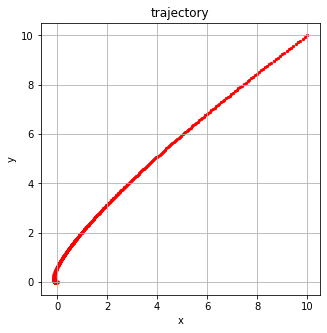

In [448]:
fig4 = plt.figure(figsize=(5,5))
ax4 = fig4.add_subplot()
ax4.scatter(sol_2.y[0, :], sol_2.y[1, :], s=5, color='r')
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_title("trajectory")
ax4.grid()

fig4.savefig('images/Part3_trajectory', dpi=150)

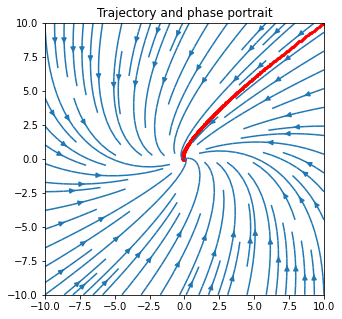

In [449]:
# define notebook parameters
x, y = np.meshgrid(np.linspace(-10, 10, 50), np.linspace(-10, 10, 50))

u = A[0][0] * x + A[0][1] * y
v = A[1][0] * x + A[1][1] * y

fig5 = plt.figure(figsize=(5, 5))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])
ax5 = fig5.add_subplot()
ax5 = plt.streamplot(x, y, u, v)
ax5 = plt.scatter(sol_2.y[0, :], sol_2.y[1, :], s=5, color='r')

ax5 = plt.title('Trajectory and phase portrait')

fig5.savefig('images/Part3_trajectoryphase', dpi=150)